<a href="https://colab.research.google.com/github/urieliram/tc_uc/blob/main/Figures_MDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

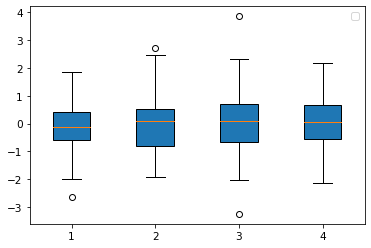

In [55]:

# load packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
cm = 1/2.54

#https://towardsdatascience.com/making-publication-quality-figures-in-python-part-iii-box-plot-bar-plot-scatter-plot-407fa457449
# prepare some data
np.random.seed(42)
data1 = np.random.randn(100)
data2 = np.random.randn(100)
data3 = np.random.randn(100)
data4 = np.random.randn(100)

fig,ax = plt.subplots()
bp = ax.boxplot(x=[data1,data2,data3,data4],  # sequence of arrays
positions=[1,2,3,4],   # where to put these arrays
patch_artist=True)  # allow filling the box with colors
ax.legend()
namefile = 'boxplot_'+'.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [56]:
df = pd.read_csv('concentrado_resul_paperMDAV002.csv',usecols=[1,2,3,4,5,6,7,8],) #names=['MEM1','MEM2','MEM3','MEM4'],  'no' 'instance' 'percent' 'number' 'season' 'profit' 'seg' 'iter' 'tielines'
                 #dtype={'MEM1':float,'MEM2':float,'MEM3':float,'MEM4':float}
                  #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
MEM   = ['MEM01','MEM02','MEM03','MEM04']
GRAPH = ['profit','seg','iter','tielines']

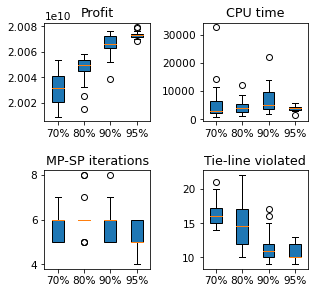

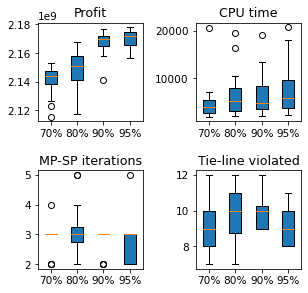

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

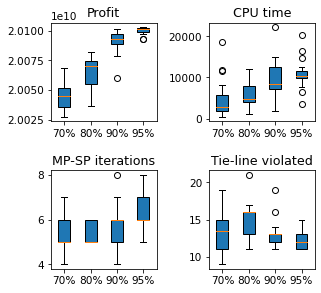

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

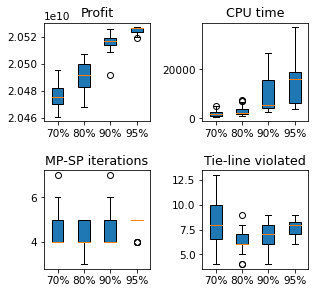

In [57]:
for mem in MEM:
  x=[]
  for graph in GRAPH:
    data1=df.loc[(df['instance'] == mem) & (df['percent'] == 70)][graph].to_numpy()
    data2=df.loc[(df['instance'] == mem) & (df['percent'] == 80)][graph].to_numpy()
    data3=df.loc[(df['instance'] == mem) & (df['percent'] == 90)][graph].to_numpy()
    data4=df.loc[(df['instance'] == mem) & (df['percent'] == 95)][graph].to_numpy()
    x.append([data1,data2,data3,data4])

  fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12*cm,11.5*cm),gridspec_kw={'wspace':0.5,'hspace':0.5})
  labels = ['70%', '80%', '90%', '95%']
  axs[0, 0].boxplot(x=x[0],labels = labels,patch_artist=True)
  axs[0, 0].set_title('Profit')
  axs[0, 1].boxplot(x=x[1],labels = labels,patch_artist=True)
  axs[0, 1].set_title('CPU time')
  axs[1, 0].boxplot(x=x[2],labels = labels,patch_artist=True)
  axs[1, 0].set_title('MP-SP iterations')
  axs[1, 1].boxplot(x=x[3],labels = labels,patch_artist=True)
  axs[1, 1].set_title('Tie-line violated')

  namefile = mem+'.pdf'
  plt.savefig(namefile, transparent=True)
  plt.show()

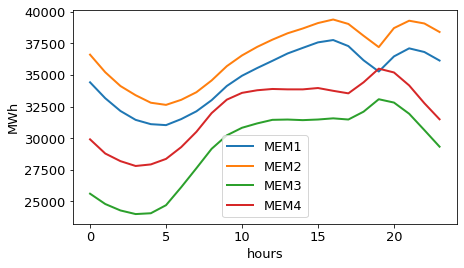

In [100]:
df = pd.read_csv('demandas.csv',usecols=[0,1,2,3],names=['MEM1','MEM2','MEM3','MEM4'],
                 dtype={'MEM1':float,'MEM2':float,'MEM3':float,'MEM4':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]

# font = { 'size':10} #'weight' : 'bold','family':'normal',
# mpl.rc('font', **font)

df.plot(figsize=(17.5*cm,10*cm),ylabel='MWh',xlabel='hours', linewidth=2)
fig.tight_layout()
namefile = 'demandas'+'.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


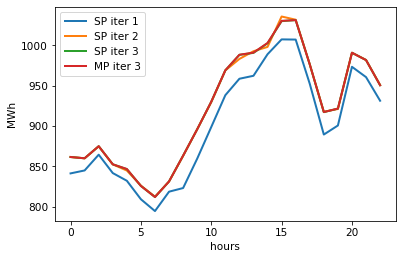

In [59]:
df = pd.read_csv('Losses.csv',usecols=[0,1,2,3]) #,names=['MEM1','MEM2','MEM3','MEM4'],
                # dtype={'MEM1':float,'MEM2':float,'MEM3':float,'MEM4':float} #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]

font = { 'size':10.5} #'weight' : 'bold','family':'normal',
mpl.rc('font', **font)
df.plot(figsize=(15.5*cm,10*cm),ylabel='MWh',xlabel='hours', linewidth=2)
fig.tight_layout()
namefile = 'Losses'+'.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

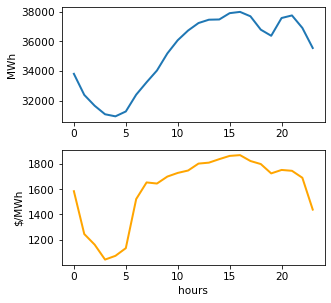

In [60]:
df = pd.read_csv('demanddual.csv',usecols=[0,1],)
# fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(12*cm,12*cm),gridspec_kw={'wspace':0.5,'hspace':0.5})

fig, axs = plt.subplots(2, 1, figsize=(12*cm,11*cm))

axs[0].plot(df['demand'], linewidth=2)
axs[1].plot(df['dual'], linewidth=2,color='orange')
axs[0].set_ylabel('MWh')
axs[1].set_ylabel('$/MWh')
axs[1].set_xlabel('hours')
fig.tight_layout()
namefile = 'DemandDual'+'.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

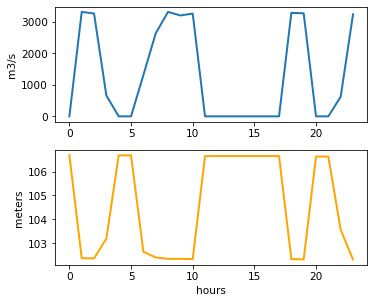

In [61]:
df = pd.read_csv('dischargevshead.csv',usecols=[0,1]) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
fig, axs = plt.subplots(2, 1, figsize=(13.5*cm,11*cm))
axs[0].plot(df['discharge'], linewidth=2)
axs[1].plot(df['head'], linewidth=2,color='orange')
axs[0].set_ylabel('m3/s')
axs[1].set_ylabel('meters')
axs[1].set_xlabel('hours')
fig.tight_layout()
namefile = 'dischargevshead'+'.pdf'
plt.savefig(namefile, transparent=True)
